# Data Load and Wrangle

## The goal of the exercise is to load a dataset, clean and transform and compute descriptive statistics

In [1]:
# This piece of code enables to display multiple output within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

<div class="alert alert-block alert-warning">
    
## Task Instructions 
### Load one of the built in dataset
### Transform the data as required 
### From a perspective of a journalist interested in writing a story about the data, **_ask and answer_** **3** questions that summarize the sample. 
    
#### Please *_only use summary statistics_* (mean, median, mode, standard deviation, variance, range,..). The statistics can be computed by groups.

#### Reference :https://kolesnikov.ga/Datasets_in_Python/

</div>

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
ccard = sm.datasets.ccard

In [3]:
dataset_ccard = ccard.load_pandas()

In [4]:
df_ccard = dataset_ccard.data

In [5]:
sm.datasets.ccard.load_pandas().data

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0
...,...,...,...,...,...
67,68.38,43.0,2.40,5.7600,0.0
68,474.15,33.0,6.00,36.0000,1.0
69,234.05,25.0,3.60,12.9600,0.0
70,451.20,26.0,5.00,25.0000,1.0


In [6]:
df_ccard.columns=['AVGEXP','AGE','INCOME', 'INCOME_SQ','OWNRENT' ]

# What is the average income for the different ages found across this dataset?

In [7]:
df_ccard.groupby('AGE')['INCOME'].mean()

AGE
20.0    1.650000
21.0    1.890000
22.0    2.076667
23.0    2.545000
24.0    2.887500
25.0    3.137500
26.0    3.110000
27.0    2.495000
28.0    4.690000
29.0    2.605000
30.0    2.623333
31.0    2.983333
32.0    9.790000
33.0    3.400000
34.0    3.766667
35.0    2.130000
36.0    3.016667
37.0    4.073333
38.0    3.560000
40.0    6.500000
41.0    5.480000
42.0    3.900000
43.0    3.693333
46.0    5.500000
55.0    2.640000
Name: INCOME, dtype: float64

# What is the average age among people who rent vs people who buy?

In [8]:
df_ccard.groupby('OWNRENT')['AGE'].mean()

OWNRENT
0.0    28.866667
1.0    35.296296
Name: AGE, dtype: float64

# What is the highest income for each age group ?

In [9]:
df_ccard.groupby('AGE')['INCOME'].max()

AGE
20.0     1.65
21.0     2.47
22.0     2.70
23.0     2.59
24.0     3.75
25.0     3.60
26.0     5.00
27.0     3.50
28.0     7.00
29.0     3.20
30.0     4.51
31.0     3.95
32.0     9.79
33.0     6.00
34.0     4.80
35.0     2.35
36.0     4.00
37.0     5.70
38.0     4.52
40.0    10.00
41.0     7.24
42.0     3.90
43.0     5.14
46.0     5.50
55.0     2.64
Name: INCOME, dtype: float64

# Comparision of summary statistics across all categories

In [10]:
df_ccard.describe()

,AVGEXP,AGE,INCOME,INCOME_SQ,OWNRENT
count,72.000000,72.000000,72.000000,72.000000,72.00000
mean,262.532083,31.277778,3.437083,14.661565,0.37500
std,318.046831,7.152705,1.699452,17.644929,0.48752
min,9.580000,20.000000,1.500000,2.250000,0.00000
25%,67.597500,26.000000,2.400000,5.760000,0.00000
50%,158.320000,30.000000,3.000000,9.000000,0.00000
75%,323.475000,36.000000,3.970000,15.761200,1.00000
max,1898.030000,55.000000,10.000000,100.000000,1.00000


# Comparing Owning/Renting with the income across the dataset

<AxesSubplot:>

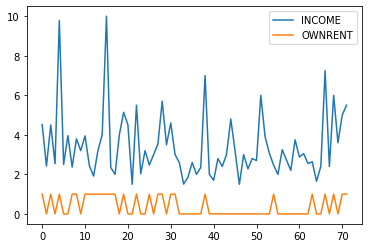

In [11]:
df_ccard[['INCOME','OWNRENT']].plot()

# What is the average experience by age?

<AxesSubplot:xlabel='AGE', ylabel='AVGEXP'>

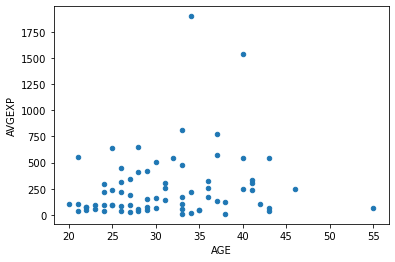

In [12]:
df_ccard.plot.scatter(x='AGE',y='AVGEXP')

# What is the frequency of Avg experience vs Income?

<AxesSubplot:ylabel='Frequency'>

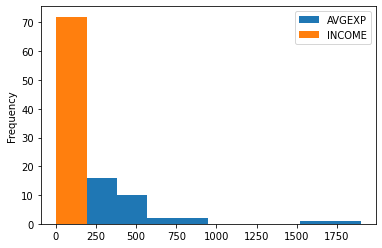

In [13]:
df_ccard[['AVGEXP','INCOME']].plot.hist()

# Is the Income normally distributed across this dataset?

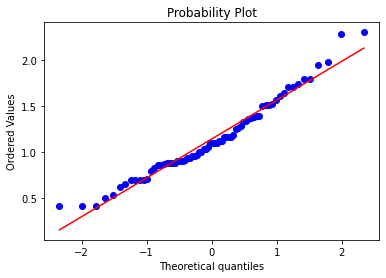

In [14]:
fig=plt.figure()
res=stats.probplot(np.log(df_ccard['INCOME']), plot=plt)

# What is the range of ages in the dataset?

Text(0.5, 1.0, 'Box Plot Showing the Age Range Across the Dataset')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc10a7e880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc10a7edc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc10a7e520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc10a8d490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc10a8d7f0>],
 'means': []}

Text(0, 0.5, 'AGE')

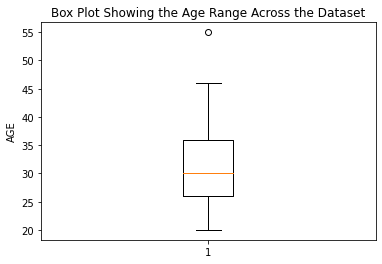

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot Showing the Age Range Across the Dataset')
ax1.boxplot(df_ccard['AGE'])
plt.ylabel("AGE")

# BoxPlot of OWNvsRent

<AxesSubplot:title={'center':'INCOME'}, xlabel='[OWNRENT]'>

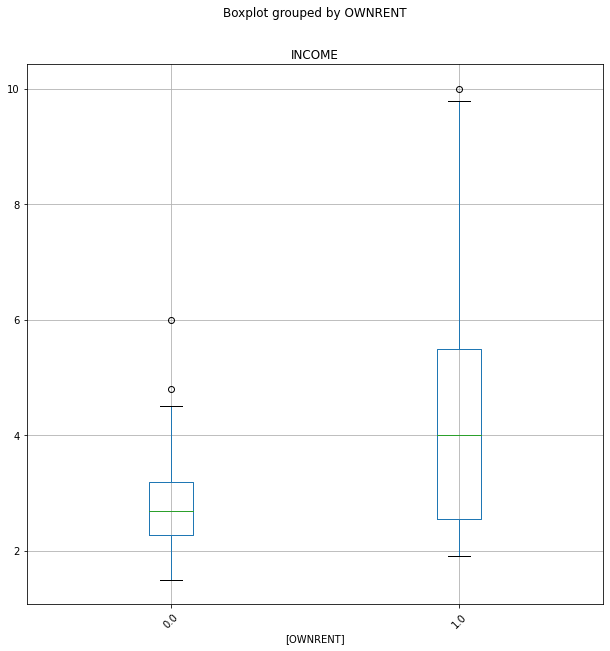

In [16]:
df_ccard[['INCOME','OWNRENT']].boxplot(column=['INCOME'],by=['OWNRENT']
                                      ,rot=45, fontsize=10, figsize=(10,10))


<AxesSubplot:title={'center':'AGE'}, xlabel='[OWNRENT]'>

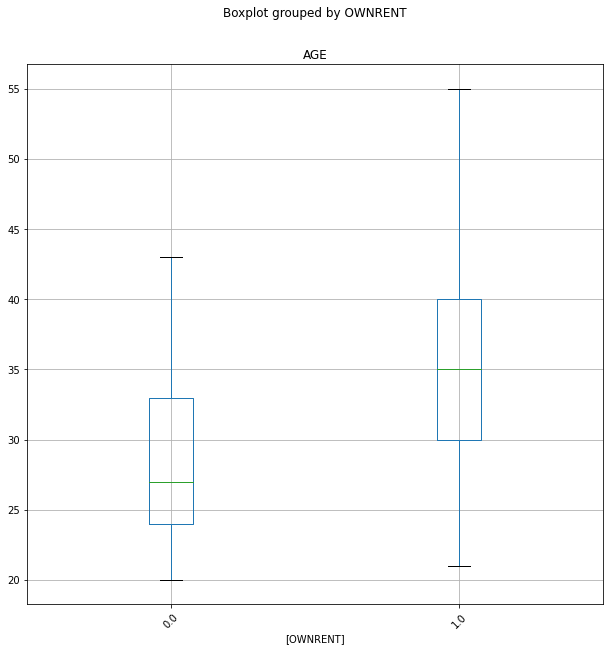

In [17]:
df_ccard[['AGE','OWNRENT']].boxplot(column=['AGE'],by=['OWNRENT'],rot=45, fontsize=10, figsize=(10,10))

# Data Analysis I

In [18]:
from scipy.stats import shapiro
series_2test = df_ccard[['AGE']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.957, p=0.015
Probably not Gaussian


In [ ]:
#H_0: people with a younger age tend to have more experience than those older than them
#H_Alternative: people with a younger age do not tend to have more experience than those older than them

In [20]:
df_ccard['AGE'] = np.log(df_ccard['AGE'])

<AxesSubplot:>

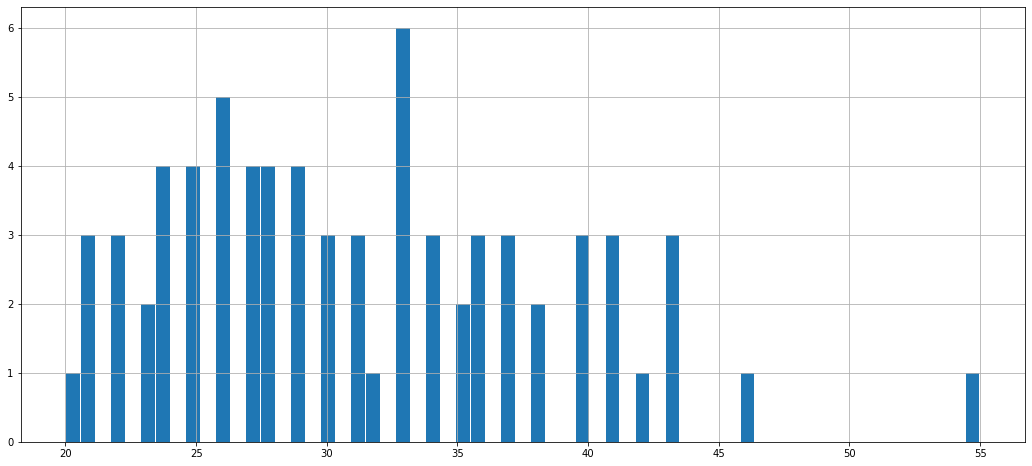

((array([-2.34237006, -1.99082273, -1.78576047, -1.63630524, -1.51641919,
         -1.41505947, -1.32645591, -1.24719392, -1.1750766 , -1.1086024 ,
         -1.04669686, -0.98856283, -0.93359131, -0.88130563, -0.83132494,
         -0.78333952, -0.7370936 , -0.69237302, -0.64899629, -0.60680784,
         -0.56567297, -0.52547391, -0.48610679, -0.44747917, -0.40950814,
         -0.37211871, -0.33524254, -0.29881684, -0.26278347, -0.22708822,
         -0.19168008, -0.1565107 , -0.12153391, -0.08670522, -0.05198142,
         -0.01732021,  0.01732021,  0.05198142,  0.08670522,  0.12153391,
          0.1565107 ,  0.19168008,  0.22708822,  0.26278347,  0.29881684,
          0.33524254,  0.37211871,  0.40950814,  0.44747917,  0.48610679,
          0.52547391,  0.56567297,  0.60680784,  0.64899629,  0.69237302,
          0.7370936 ,  0.78333952,  0.83132494,  0.88130563,  0.93359131,
          0.98856283,  1.04669686,  1.1086024 ,  1.1750766 ,  1.24719392,
          1.32645591,  1.41505947,  1.

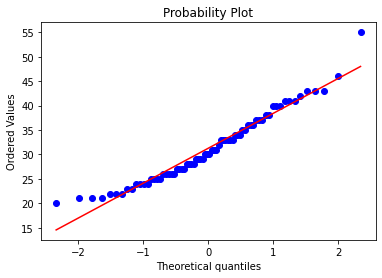

((array([-2.34237006, -1.99082273, -1.78576047, -1.63630524, -1.51641919,
         -1.41505947, -1.32645591, -1.24719392, -1.1750766 , -1.1086024 ,
         -1.04669686, -0.98856283, -0.93359131, -0.88130563, -0.83132494,
         -0.78333952, -0.7370936 , -0.69237302, -0.64899629, -0.60680784,
         -0.56567297, -0.52547391, -0.48610679, -0.44747917, -0.40950814,
         -0.37211871, -0.33524254, -0.29881684, -0.26278347, -0.22708822,
         -0.19168008, -0.1565107 , -0.12153391, -0.08670522, -0.05198142,
         -0.01732021,  0.01732021,  0.05198142,  0.08670522,  0.12153391,
          0.1565107 ,  0.19168008,  0.22708822,  0.26278347,  0.29881684,
          0.33524254,  0.37211871,  0.40950814,  0.44747917,  0.48610679,
          0.52547391,  0.56567297,  0.60680784,  0.64899629,  0.69237302,
          0.7370936 ,  0.78333952,  0.83132494,  0.88130563,  0.93359131,
          0.98856283,  1.04669686,  1.1086024 ,  1.1750766 ,  1.24719392,
          1.32645591,  1.41505947,  1.

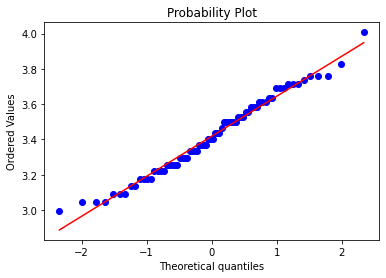

In [19]:
df_ccard['AGE'].hist(bins=61, rwidth=.9, figsize=(18,8))
plt.show()
stats.probplot(df_ccard['AGE'], plot=plt)
plt.show()
stats.probplot(np.log(df_ccard['AGE']), plot=plt)
plt.show()

In [21]:
subsetd = df_ccard[['AVGEXP','AGE','INCOME']]

In [22]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

target= subsetd['AGE']
df_train = subsetd.drop(['AGE'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)
ccard_train = pd.concat([x_train, y_train], axis=1)
ccard_test = pd.concat([x_test, y_test], axis=1)

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)
print(lin_reg.fit)
print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

LinearRegression(normalize=True)

<bound method LinearRegression.fit of LinearRegression(normalize=True)>
3.2380169966719716


,Coefficient
AVGEXP,-0.000046
INCOME,0.059047
